## CHICAGO DIVVY BIKE SHARING ANALYSIS

<b> Importing libraries and reading data files 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
from math import sin, cos, sqrt, atan2, radians
import statsmodels.formula.api as sm
from folium import plugins
import matplotlib.pylab as plt #Typically matplotlib.pylab is imported as plt (shortened name)
%matplotlib inline 
#The above line is necessary so that figures are displayed on the webpage instead of separate pop-ups
import seaborn as sns
import time
import folium

In [2]:
#importing last 4 years Divvy data
data=pd.read_csv('datanew.csv')

# Data Cleaning

In [3]:
#checking for null values in the data
t0=time.time()
data.isnull().sum()
#we didn't get any null values in the data, so we can go ahead with this data

Unnamed: 0           0
trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dtype: int64

In [4]:
#since the data for 4 years is huge, we are using only 2017 data to perform our analysis
datan=data[data['year']==2017]
datan.head()

,Unnamed: 0,trip_id,year,month,week,day,hour,usertype,gender,starttime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,6537545,13518905,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:59:07,...,66,Clinton St & Lake St,41.885637,-87.641823,23.0,171,May St & Cullerton St,41.855136,-87.654127,11.0
1,6537546,13518904,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:56:25,...,199,Wabash Ave & Grand Ave,41.890912,-87.626804,15.0,26,McClurg Ct & Illinois St,41.891020,-87.617300,31.0
2,6537547,13518903,2017,3,13,4,23,Subscriber,Female,2017-03-31 23:55:33,...,520,Greenview Ave & Jarvis Ave,42.015962,-87.668570,23.0,432,Clark St & Lunt Ave,42.009074,-87.674190,19.0
3,6537548,13518902,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:54:46,...,110,Dearborn St & Erie St,41.893992,-87.629318,23.0,142,McClurg Ct & Erie St,41.894503,-87.617854,31.0
4,6537549,13518901,2017,3,13,4,23,Subscriber,Female,2017-03-31 23:53:33,...,327,Sheffield Ave & Webster Ave,41.921540,-87.653818,19.0,331,Halsted St & Blackhawk St (*),41.908537,-87.648627,20.0


In [5]:
datan=datan.sort_values('trip_id')
datan=datan.drop(columns=['week'])
datan=datan.drop(columns=['Unnamed: 0']) #dropping irrelevant columns
datan=datan.sort_values('trip_id')
datan.head()
#Dropping the unecessary columns

,trip_id,year,month,day,hour,usertype,gender,starttime,stoptime,tripduration,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
385358,12979231,2017,1,6,0,Subscriber,Male,2017-01-01 00:02:54,2017-01-01 00:08:21,5.450000,...,28,Larrabee St & Menomonee St,41.914680,-87.643320,15.0,20,Sheffield Ave & Kingsbury St,41.910522,-87.653106,15.0
385357,12979232,2017,1,6,0,Subscriber,Male,2017-01-01 00:06:06,2017-01-01 00:18:31,12.416667,...,620,Orleans St & Chestnut St (NEXT Apts),41.898203,-87.637536,15.0,333,Ashland Ave & Blackhawk St,41.907066,-87.667252,15.0
385356,12979233,2017,1,6,0,Subscriber,Male,2017-01-01 00:07:28,2017-01-01 00:12:51,5.383333,...,287,Franklin St & Monroe St,41.880317,-87.635185,27.0,68,Clinton St & Tilden St,41.875885,-87.640795,23.0
385355,12979234,2017,1,6,0,Subscriber,Male,2017-01-01 00:07:57,2017-01-01 00:20:53,12.933333,...,300,Broadway & Barry Ave,41.937725,-87.644095,19.0,118,Sedgwick St & North Ave,41.911386,-87.638677,19.0
385354,12979235,2017,1,6,0,Subscriber,Male,2017-01-01 00:10:44,2017-01-01 00:21:27,10.716667,...,47,State St & Kinzie St,41.889187,-87.627754,31.0,175,Wells St & Polk St,41.872596,-87.633502,19.0


In [6]:
datan=datan.reset_index()

In [7]:
datan=datan.drop('index',axis=1)
datan.head()

,trip_id,year,month,day,hour,usertype,gender,starttime,stoptime,tripduration,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,12979231,2017,1,6,0,Subscriber,Male,2017-01-01 00:02:54,2017-01-01 00:08:21,5.450000,...,28,Larrabee St & Menomonee St,41.914680,-87.643320,15.0,20,Sheffield Ave & Kingsbury St,41.910522,-87.653106,15.0
1,12979232,2017,1,6,0,Subscriber,Male,2017-01-01 00:06:06,2017-01-01 00:18:31,12.416667,...,620,Orleans St & Chestnut St (NEXT Apts),41.898203,-87.637536,15.0,333,Ashland Ave & Blackhawk St,41.907066,-87.667252,15.0
2,12979233,2017,1,6,0,Subscriber,Male,2017-01-01 00:07:28,2017-01-01 00:12:51,5.383333,...,287,Franklin St & Monroe St,41.880317,-87.635185,27.0,68,Clinton St & Tilden St,41.875885,-87.640795,23.0
3,12979234,2017,1,6,0,Subscriber,Male,2017-01-01 00:07:57,2017-01-01 00:20:53,12.933333,...,300,Broadway & Barry Ave,41.937725,-87.644095,19.0,118,Sedgwick St & North Ave,41.911386,-87.638677,19.0
4,12979235,2017,1,6,0,Subscriber,Male,2017-01-01 00:10:44,2017-01-01 00:21:27,10.716667,...,47,State St & Kinzie St,41.889187,-87.627754,31.0,175,Wells St & Polk St,41.872596,-87.633502,19.0


## EXPLORATORY DATA ANALYSIS

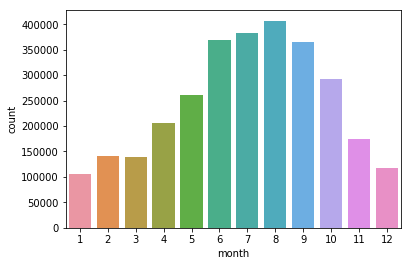

In [8]:
sns.barplot(x = 'month', y = datan['trip_id'].value_counts(), data = datan)
sns.countplot(x='month', data=datan)

<b>THE ABOVE GRAPH PLOTS THE COUNT OF TRIPS VS MONTHS</b><br>The highest number of trips is during the <b>summer</b> as is evident from the graph

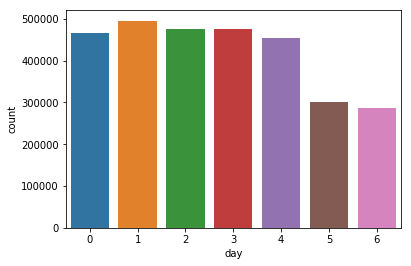

In [9]:
sns.countplot(x='day', data=datan)

<b>THE ABOVE GRAPH PLOTS THE COUNT OF TRIPS VS DAY OF THE WEEK</b><br>We can see that the weekdays see more number of trips as compared to the weekend

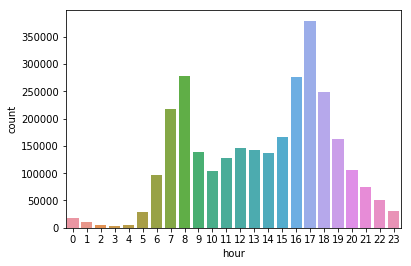

In [10]:
sns.countplot(x='hour', data=datan)

<B>THE ABOVE GRAPH PLOTS THE COUNT OF TRIPS VS EACH HOUR OF THE DAY</B><br>We can see that there is a peak in the number of trips during the times from <b>7-9 am</b> in the morning and <b>4-7 pm</b> in the Evening

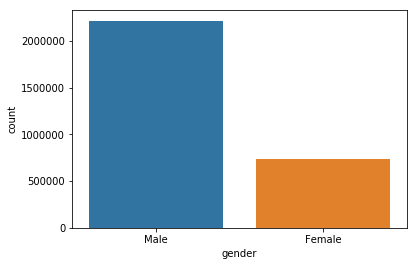

In [11]:
sns.countplot(x='gender', data=datan)

<B>THE ABOVE GRAPH PLOTS THE NUMBER OF CUSTOMERS VS THEIR GENDER</B><BR>We can see that the number of men are nearly <b>3</b> times the number of females

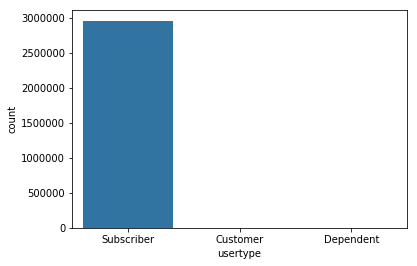

In [12]:
sns.countplot(x='usertype', data=datan)

In [13]:
databyUserType=datan.groupby("usertype")
databyUserType["trip_id"].describe()

,count,mean,std,min,25%,50%,75%,max
usertype,,,,,,,,
Customer,832.0,1.466081e+07,9.571017e+05,13029459.0,13909583.25,14633857.0,15307080.75,16718229.0
Dependent,4.0,1.324131e+07,1.238093e+05,13070858.0,13191518.00,13272626.0,13322420.50,13349140.0
Subscriber,2956854.0,1.528700e+07,1.358794e+06,12979231.0,14073315.25,15305569.0,16503471.75,17536701.0


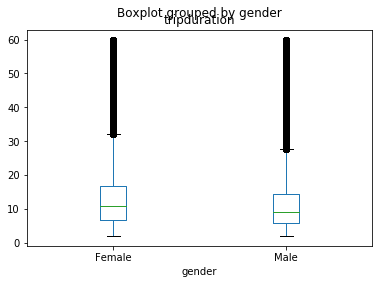

In [14]:
fig=datan.boxplot(by='gender',column=['tripduration'],grid=False)

<b>From the above boxplot we can observe that the average duration of trips of females is higher when compared to males

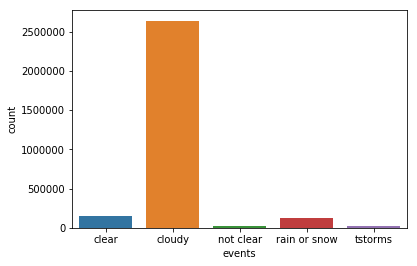

In [15]:
sns.countplot(x='events', data=datan)

<b>Since the city in consideration, Chicago is cloudy almost the entire year, it is quite obvious that most of the trips will be during cloudy conditions 

## Calculating The Distance between the Starting and End Locations of the Trip using Latitude & Longitude

In [16]:
# approximate radius of earth in km
def dis(row):
    R = 6373.0
    
    lat1 = radians(row['latitude_start'])
    lon1 = radians(row['longitude_start'])
    lat2 = radians(row['latitude_end'])
    lon2 = radians(row['longitude_end'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = (R * c)*0.621371 #converting to miles
    return str(distance)

#time to run this code in seconds
t5=time.time()
datan['Distance_Covered']=datan.apply(dis,axis=1)
t6=time.time()
print("Time to run this code")
print(t6-t5)

Time to run this code
117.74907088279724


<b> Converting Latitude & Longitude to float type

In [17]:
def convertToFloat(x):
    try:
        x = float(x)
    except Exception:
        x = None
    return x

In [18]:
datan["latitude_start"] = datan["latitude_start"].apply(convertToFloat)
datan["longitude_start"] = datan["longitude_start"].apply(convertToFloat)
datan["latitude_end"] = datan["latitude_end"].apply(convertToFloat)
datan["longitude_end"] = datan["longitude_end"].apply(convertToFloat)

<b> CREATING DUMMY VARIABLES FOR CATEGORICAL VARIABLES

In [19]:
dummy_gender = pd.get_dummies(datan['gender'])
print(dummy_gender.head()) # CREATING DUMMY VARIABLES FOR GENDER

   Female  Male
0       0     1
1       0     1
2       0     1
3       0     1
4       0     1


In [20]:
datan.head()

,trip_id,year,month,day,hour,usertype,gender,starttime,stoptime,tripduration,...,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,Distance_Covered
0,12979231,2017,1,6,0,Subscriber,Male,2017-01-01 00:02:54,2017-01-01 00:08:21,5.450000,...,Larrabee St & Menomonee St,41.914680,-87.643320,15.0,20,Sheffield Ave & Kingsbury St,41.910522,-87.653106,15.0,0.5795869923015162
1,12979232,2017,1,6,0,Subscriber,Male,2017-01-01 00:06:06,2017-01-01 00:18:31,12.416667,...,Orleans St & Chestnut St (NEXT Apts),41.898203,-87.637536,15.0,333,Ashland Ave & Blackhawk St,41.907066,-87.667252,15.0,1.6467894503685205
2,12979233,2017,1,6,0,Subscriber,Male,2017-01-01 00:07:28,2017-01-01 00:12:51,5.383333,...,Franklin St & Monroe St,41.880317,-87.635185,27.0,68,Clinton St & Tilden St,41.875885,-87.640795,23.0,0.4209217412211696
3,12979234,2017,1,6,0,Subscriber,Male,2017-01-01 00:07:57,2017-01-01 00:20:53,12.933333,...,Broadway & Barry Ave,41.937725,-87.644095,19.0,118,Sedgwick St & North Ave,41.911386,-87.638677,19.0,1.8416168312760992
4,12979235,2017,1,6,0,Subscriber,Male,2017-01-01 00:10:44,2017-01-01 00:21:27,10.716667,...,State St & Kinzie St,41.889187,-87.627754,31.0,175,Wells St & Polk St,41.872596,-87.633502,19.0,1.1842206276814133


In [21]:
data_full = datan.join(dummy_gender)

In [22]:
data_for_plot=data_full.drop(["year","Female","latitude_start","longitude_start","latitude_end","longitude_end"],axis=1)

In [23]:
data_for_plot.head()

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,dpcapacity_start,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male
0,12979231,1,6,0,Subscriber,Male,2017-01-01 00:02:54,2017-01-01 00:08:21,5.450000,23.0,clear,28,Larrabee St & Menomonee St,15.0,20,Sheffield Ave & Kingsbury St,15.0,0.5795869923015162,1
1,12979232,1,6,0,Subscriber,Male,2017-01-01 00:06:06,2017-01-01 00:18:31,12.416667,23.0,clear,620,Orleans St & Chestnut St (NEXT Apts),15.0,333,Ashland Ave & Blackhawk St,15.0,1.6467894503685205,1
2,12979233,1,6,0,Subscriber,Male,2017-01-01 00:07:28,2017-01-01 00:12:51,5.383333,23.0,clear,287,Franklin St & Monroe St,27.0,68,Clinton St & Tilden St,23.0,0.4209217412211696,1
3,12979234,1,6,0,Subscriber,Male,2017-01-01 00:07:57,2017-01-01 00:20:53,12.933333,23.0,clear,300,Broadway & Barry Ave,19.0,118,Sedgwick St & North Ave,19.0,1.8416168312760992,1
4,12979235,1,6,0,Subscriber,Male,2017-01-01 00:10:44,2017-01-01 00:21:27,10.716667,23.0,clear,47,State St & Kinzie St,31.0,175,Wells St & Polk St,19.0,1.1842206276814133,1


## SAMPLING (To reduce the run time of code & make it more efficient)

In [24]:
dataSampling=data_for_plot.sample(frac=0.01) #We are sampling the data so that we can run the linear regression

In [25]:
len(dataSampling) #size of our sample data

29577

<b> PLOTTING CORRELATION MATRIX TO IDENTIFY THE CORRELATION AMONG INDEPENDENT VARIABLES

In [26]:
corr = round(dataSampling.corr(),2)
corr.style.background_gradient()

,trip_id,month,day,hour,tripduration,temperature,from_station_id,dpcapacity_start,to_station_id,dpcapacity_end,Male
trip_id,1,0.98,-0.01,-0,-0.01,0.1,0.01,0.04,0.01,0.05,0
month,0.98,1,-0.01,0,0,0.14,0.01,0.04,0.01,0.04,-0
day,-0.01,-0.01,1,-0.01,0.06,0.06,0.05,-0.07,0.05,-0.07,-0.05
hour,-0,0,-0.01,1,0.05,0.15,-0.01,0.01,0.1,-0.14,0
tripduration,-0.01,0,0.06,0.05,1,0.13,0.03,0.01,0.05,-0.01,-0.1
temperature,0.1,0.14,0.06,0.15,0.13,1,0.01,0.01,0.03,-0.02,-0.07
from_station_id,0.01,0.01,0.05,-0.01,0.03,0.01,1,-0.32,0.36,-0.2,-0.03
dpcapacity_start,0.04,0.04,-0.07,0.01,0.01,0.01,-0.32,1,-0.2,0.23,0.05
to_station_id,0.01,0.01,0.05,0.1,0.05,0.03,0.36,-0.2,1,-0.32,-0.03
dpcapacity_end,0.05,0.04,-0.07,-0.14,-0.01,-0.02,-0.2,0.23,-0.32,1,0.05


The below cell will take a while to run 
<br><b>It will plot a pairplot among all the columns to identify any possible correlation

In [27]:
#ts=time.time()
#g = sns.pairplot(dataSampling) #The pair plot which give us the opportunity to learn about the relation about all the variables and tp come up with variables showing important trends
#te=time.time()

In [28]:
#print("The time taken to plot the graph:",(te=ts))

## SINGLE VARIABLE REGRESSION

In [29]:
databytemperature=data_full.groupby(["temperature"]) #grouping the samples based on temperature

In [30]:
data_temp=databytemperature["trip_id"].count() #COunting the number of trips based on temperature

In [31]:
Temp_X=data_temp.index #Storing the indexes of  of data_temp described above as independent variable

In [32]:
Temp_Y=data_temp.values #Storing the values of  of data_temp described above as dependent variable

<b> Temperature vs Number of trips

In [33]:
Temp_result = sm.ols(formula="Temp_Y ~ Temp_X", data=databytemperature).fit() #Running the linear regression of number of trips on temperature
print(Temp_result.summary()) #Printing the summary results

                            OLS Regression Results                            
Dep. Variable:                 Temp_Y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     46.92
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           2.98e-10
Time:                        02:11:41   Log-Likelihood:                -1457.5
No. Observations:                 127   AIC:                             2919.
Df Residuals:                     125   BIC:                             2925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1743.2319   4207.810     -0.414      0.6

<b>The regresion model has a p value of 0.000 which is less than the level of significance, which shows the influence of number of trips on temperature. However the R Squared Value is not that high which specifies that the model is not that efficient. There can be seen a positive correlation here.</b>

In [34]:
data_tripduration=data_full['tripduration'].values #Storing the values of trip duration and taking it as the dependent variable

In [35]:
data_tripduration_temp=data_full['temperature'].values #Storing the values of temperature and taking it as independent variable


<b> Trip duration vs temperature (Single-variable regression)

In [36]:
Temp_trip_result = sm.ols(formula="data_tripduration ~ data_tripduration_temp", data=data_full).fit() #Runnig regression of trip duration on temperature
print(Temp_trip_result.summary())

                            OLS Regression Results                            
Dep. Variable:      data_tripduration   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 5.592e+04
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:11:42   Log-Likelihood:            -1.0022e+07
No. Observations:             2957690   AIC:                         2.004e+07
Df Residuals:                 2957688   BIC:                         2.004e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

<b>The regresion model has a p value of 0.000 which is less than the level of significance. However the R Squared Value is very less which specifies that the model is not efficient. There can be seen a positive correlation here.</b>

In [37]:
X_dist=data_full['temperature'].values #Storing the values of temperature and taking it as the dependent variable

In [38]:
Y_temp=data_full['Distance_Covered'].values #Storing the values of distance covered and taking it as the independent variable

In [39]:
#Temp_dist_result = sm.ols(formula="Y_temp ~ X_dist", data=data_full).fit() #Running regression of temperature on distance
#print(Temp_dist_result.summary())

<b>The regresion model has a p value of 0.000 which is less than the level of significance. However the R Squared Value is very less which specifies that the model is not efficient. There can be seen a positive correlation here.</b>

<b>We can see that the linear regression is not efficient and to have a better analysis we need to go for multile regression and clustering.</b>

<b>To apply clustering, we take some attributes such as gender, distance, time and gender to come with the prediction of types of customers

In [40]:
dataSampling["rushhour"]=0 #Creating an attribute of rush hour which to store the dummy variables

In [41]:
dataSampling["weekend"]=0 #Creating an attribute of weekend which to store the dummy variables

In [42]:
dataSampling["distance_2"]=0 #Creating an attribute of distance_2 which to store the dummy variables

In [43]:
dataSampling.head() #This is how the dataframe looks like

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,from_station_name,dpcapacity_start,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,Clinton St & Lake St,23.0,98,LaSalle St & Washington St,15.0,0.5204584114354429,1,0,0,0
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,Rush St & Superior St,23.0,35,Streeter Dr & Grand Ave,47.0,0.7529339937263224,1,0,0,0
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,Clark St & Lincoln Ave,23.0,54,Ogden Ave & Chicago Ave,19.0,1.6692350357470995,1,0,0,0
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,Clark St & Elm St,27.0,291,Wells St & Evergreen Ave,19.0,0.31710695066762845,1,0,0,0
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,Stetson Ave & South Water St,19.0,195,Columbus Dr & Randolph St,47.0,0.20481417788550318,1,0,0,0


## K-MEANS CLUSTERING

In [44]:
dataSampling["Cluster"]=0 #Creating one more attribute to store the number of clusters

In [45]:
def tagrushhour(x):  #Defining a function to categorize the number of hours into rush hours and non rush hours  
    if (x>=7 and x<=10) or (x>=16 and x<=19): #If rush hours (between 7am to 10 am and 4pm to 7 pm)
        x=1 #Assign x =1
    else: #If non rush hours
        x=0 #Assign x=0
    return x

In [46]:
dataSampling.rushhour=list(map(tagrushhour,dataSampling.hour.values)) #Using map to apply the tagrush hour function to the dataset


In [47]:
dataSampling.head()

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,dpcapacity_start,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2,Cluster
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,23.0,98,LaSalle St & Washington St,15.0,0.5204584114354429,1,1,0,0,0
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,23.0,35,Streeter Dr & Grand Ave,47.0,0.7529339937263224,1,1,0,0,0
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,23.0,54,Ogden Ave & Chicago Ave,19.0,1.6692350357470995,1,1,0,0,0
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,27.0,291,Wells St & Evergreen Ave,19.0,0.31710695066762845,1,1,0,0,0
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,19.0,195,Columbus Dr & Randolph St,47.0,0.20481417788550318,1,0,0,0,0


In [48]:
def tagweek(x): #Defining a function to categorize the number of days into working days and weekend
    if (x>=0 and x<=4): #If days are the working days i.e from monday to friday
        x=0 #Assign x equals 0
    else: #If days are of weekends i.e Saturday and Sunday
        x=1 #Assign x equals 1
    return x

In [49]:
dataSampling["Distance_Covered"] = dataSampling["Distance_Covered"].apply(convertToFloat) # Converting distance covered to float type

In [50]:
dataSampling.weekend=list(map(tagweek,dataSampling.day.values)) #Using map to apply the tagweek function to the dataset

In [51]:
dataSampling.head()

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,dpcapacity_start,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2,Cluster
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,23.0,98,LaSalle St & Washington St,15.0,0.520458,1,1,0,0,0
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,23.0,35,Streeter Dr & Grand Ave,47.0,0.752934,1,1,1,0,0
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,23.0,54,Ogden Ave & Chicago Ave,19.0,1.669235,1,1,0,0,0
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,27.0,291,Wells St & Evergreen Ave,19.0,0.317107,1,1,0,0,0
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,19.0,195,Columbus Dr & Randolph St,47.0,0.204814,1,0,0,0,0


In [52]:
dataSamplingCluster=dataSampling[['Male','rushhour','weekend']].copy()
dataSamplingCluster

,Male,rushhour,weekend
2061116,1,1,0
2107963,1,1,1
1653190,1,1,0
2095010,1,1,0
790128,1,0,0
2440769,0,0,0
1830991,0,1,0
2057758,1,0,0
791944,1,1,0
1587831,0,0,0


In [53]:
#Using other libraries
from sklearn.cluster import KMeans

#Determining number of clusters
nClusters=range(2,10)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(dataSamplingCluster)
    sumDistances.append(kmeans.inertia_) #Proxy for SSE

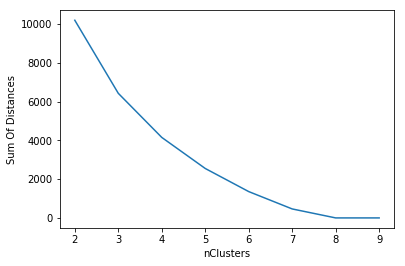

In [54]:
#Plotting the Elbow Plot 
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.show()

<b>The above elbow curve shows that there is 6 or 8 number of clusters to be made. This has been made without taking the categorical distance into consideration. Now we will take distace into consideration.

In [55]:
kmeans=KMeans(n_clusters=8).fit(dataSamplingCluster)

dataSampling['Cluster']=kmeans.labels_
#g = sns.pairplot(data,hue='Cluster')

In [56]:
dataSampling.head()

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,dpcapacity_start,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2,Cluster
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,23.0,98,LaSalle St & Washington St,15.0,0.520458,1,1,0,0,0
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,23.0,35,Streeter Dr & Grand Ave,47.0,0.752934,1,1,1,0,5
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,23.0,54,Ogden Ave & Chicago Ave,19.0,1.669235,1,1,0,0,0
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,27.0,291,Wells St & Evergreen Ave,19.0,0.317107,1,1,0,0,0
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,19.0,195,Columbus Dr & Randolph St,47.0,0.204814,1,0,0,0,1


In [57]:
dataSamplingCluster.head()

,Male,rushhour,weekend
2061116,1,1,0
2107963,1,1,1
1653190,1,1,0
2095010,1,1,0
790128,1,0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


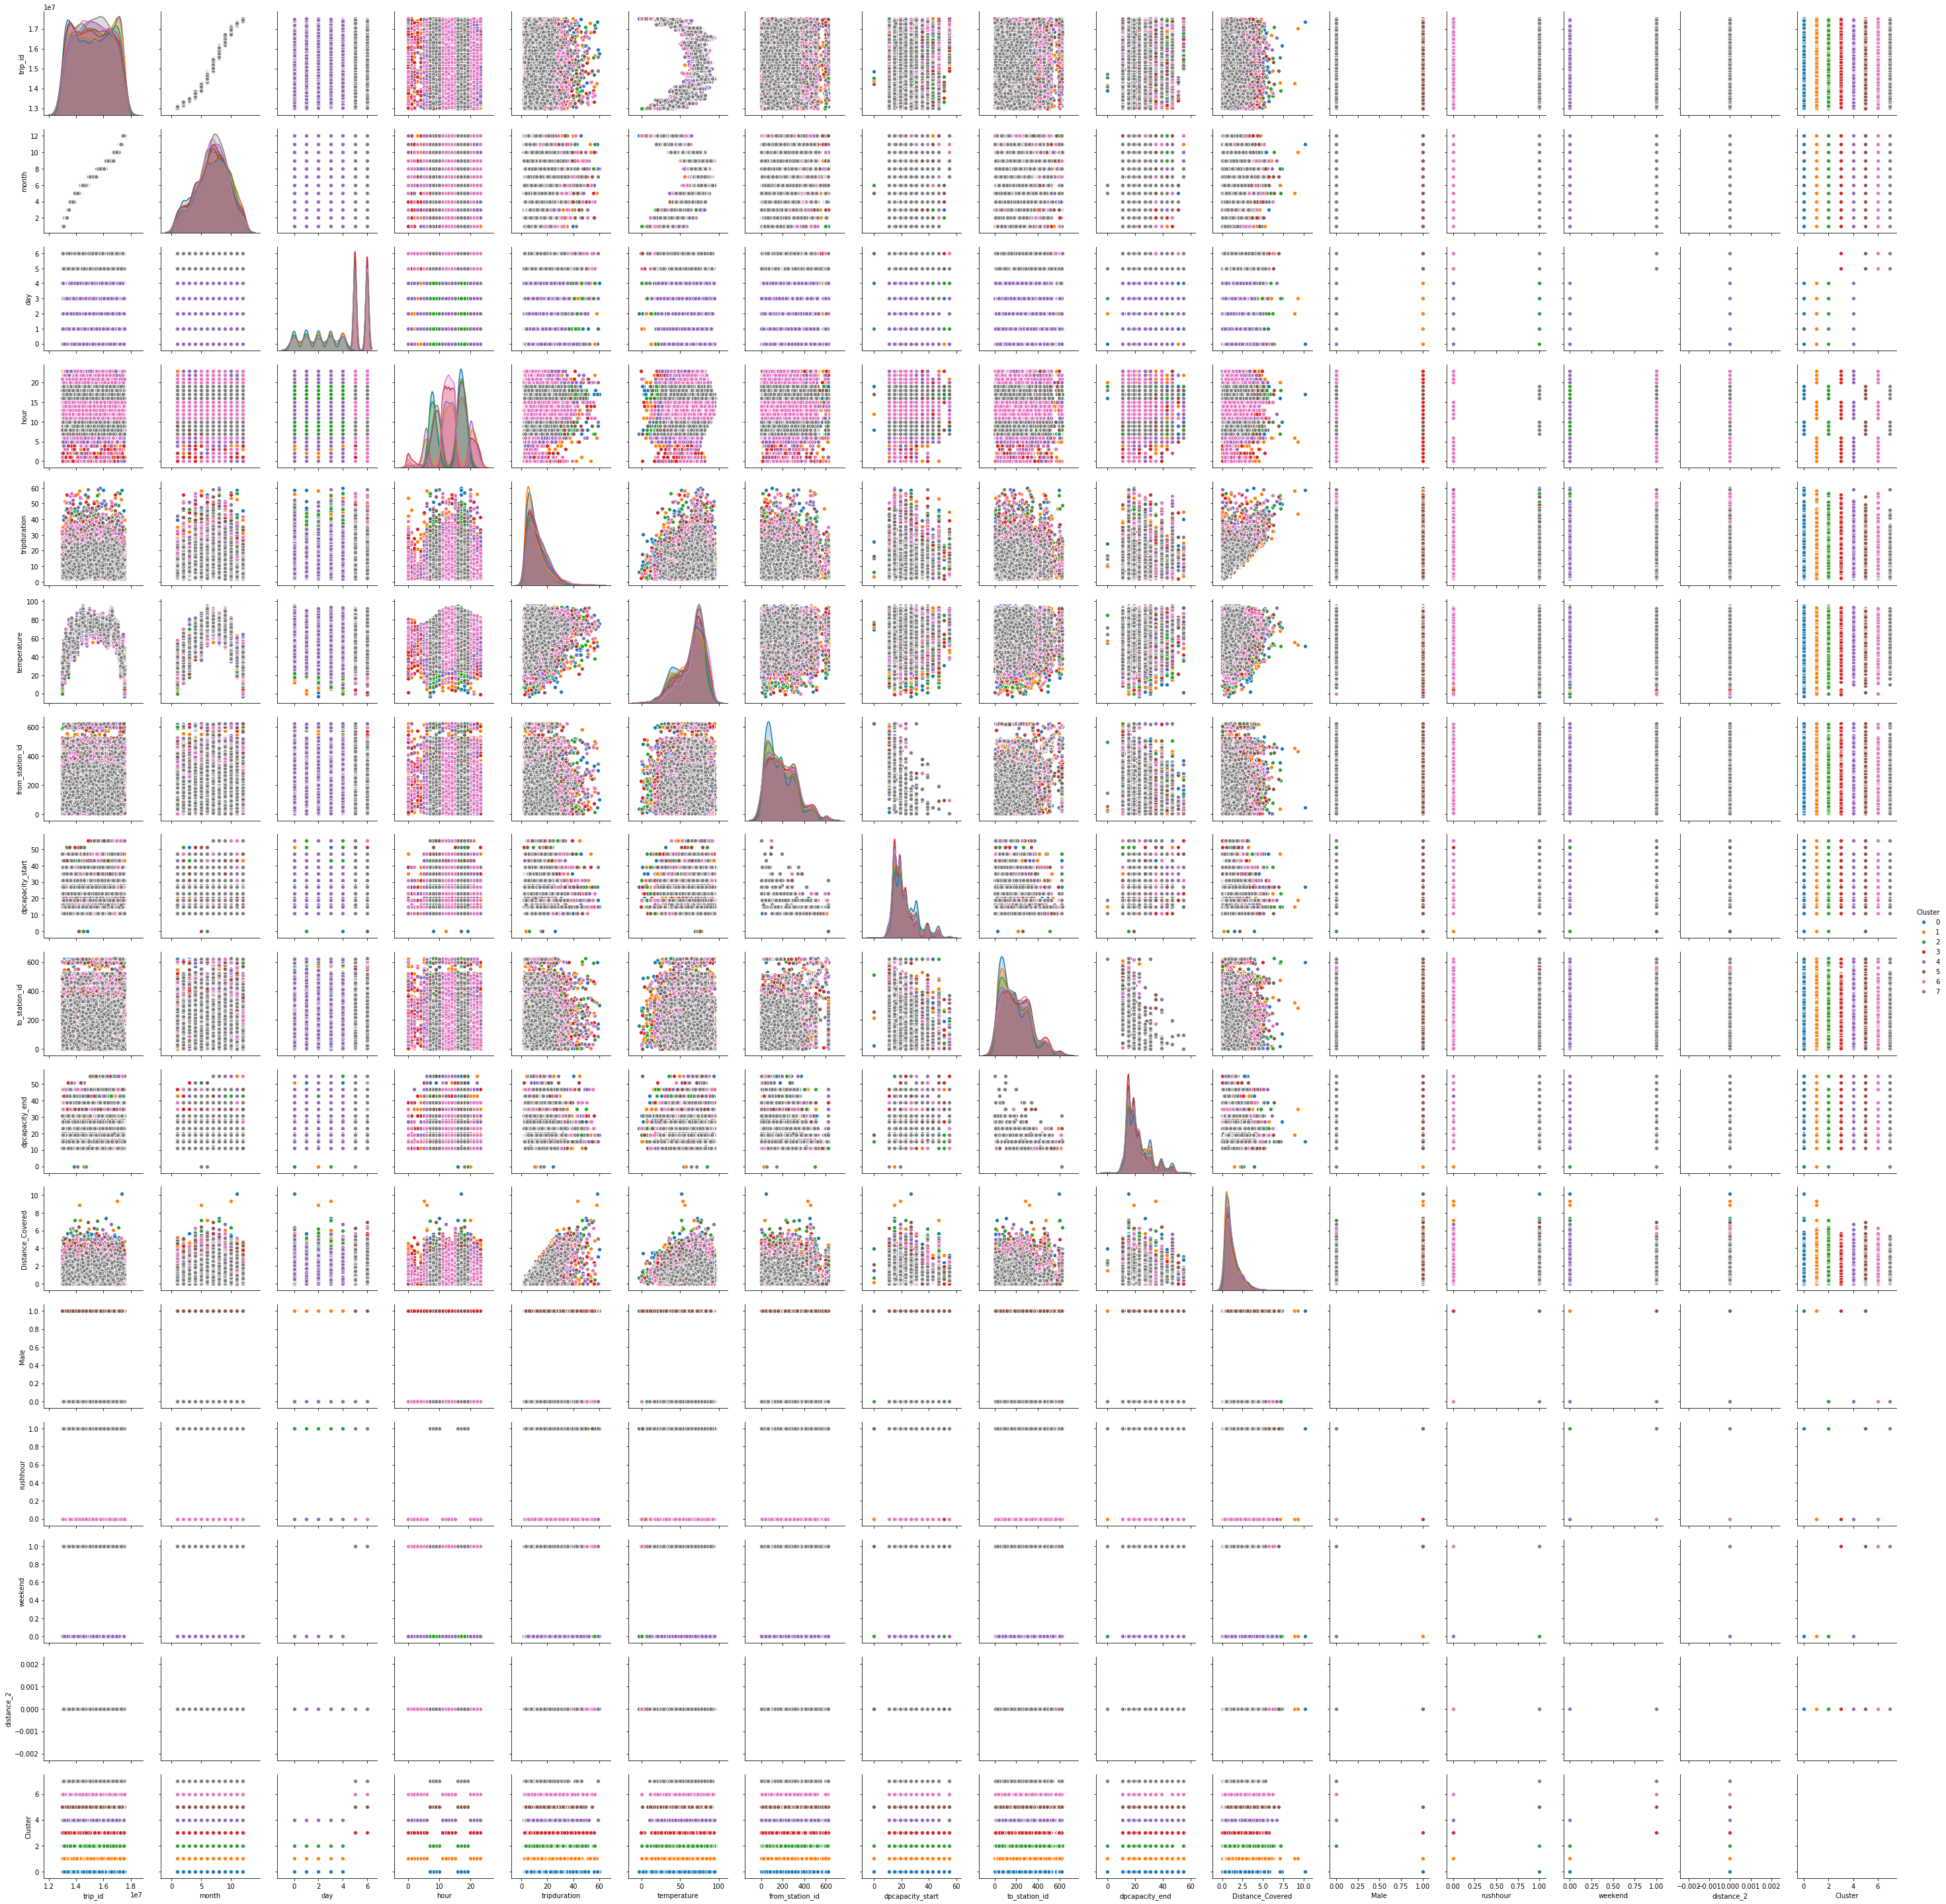

In [58]:
g = sns.pairplot(dataSampling,hue='Cluster')

In [59]:
dataSampling.head()

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,dpcapacity_start,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2,Cluster
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,23.0,98,LaSalle St & Washington St,15.0,0.520458,1,1,0,0,0
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,23.0,35,Streeter Dr & Grand Ave,47.0,0.752934,1,1,1,0,5
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,23.0,54,Ogden Ave & Chicago Ave,19.0,1.669235,1,1,0,0,0
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,27.0,291,Wells St & Evergreen Ave,19.0,0.317107,1,1,0,0,0
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,19.0,195,Columbus Dr & Randolph St,47.0,0.204814,1,0,0,0,1


In [60]:
def tagdistance(x): #Function to categorize the distance
    if (x<=2): #If the distance is less than or equal to 2 miles
        x=1 #Assign x equals 1
    else: #If the distance is more than 2 miles
        x=0 #Assign x equals 2
    return x

In [61]:
dataSampling.distance_2=list(map(tagdistance,dataSampling.Distance_Covered.values))  #Using map to apply the tagdistance function to the dataset

In [62]:
dataSampling

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,dpcapacity_start,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2,Cluster
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,23.0,98,LaSalle St & Washington St,15.0,0.520458,1,1,0,1,0
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,23.0,35,Streeter Dr & Grand Ave,47.0,0.752934,1,1,1,1,5
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,23.0,54,Ogden Ave & Chicago Ave,19.0,1.669235,1,1,0,1,0
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,27.0,291,Wells St & Evergreen Ave,19.0,0.317107,1,1,0,1,0
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,19.0,195,Columbus Dr & Randolph St,47.0,0.204814,1,0,0,1,1
2440769,16828122,10,4,11,Subscriber,Female,2017-10-06 11:52:00,2017-10-06 11:57:00,5.050000,64.0,...,19.0,22,May St & Taylor St,15.0,0.277296,0,0,0,1,4
1830991,15880330,8,4,9,Subscriber,Female,2017-08-18 09:09:48,2017-08-18 09:28:15,18.450000,72.0,...,19.0,196,Cityfront Plaza Dr & Pioneer Ct,23.0,1.858597,0,1,0,1,2
2057758,16259033,9,2,6,Subscriber,Male,2017-09-06 06:39:05,2017-09-06 06:43:09,4.066667,50.0,...,19.0,293,Broadway & Wilson Ave,15.0,0.494687,1,0,0,1,1
791944,14154849,5,3,16,Subscriber,Male,2017-05-25 16:22:37,2017-05-25 16:30:41,8.066667,66.0,...,19.0,504,Campbell Ave & Fullerton Ave,15.0,1.455819,1,1,0,1,0
1587831,15488449,7,0,6,Subscriber,Female,2017-07-31 06:51:00,2017-07-31 07:05:14,14.233333,68.0,...,19.0,25,Michigan Ave & Pearson St,23.0,1.152962,0,0,0,1,4


In [63]:
dataSamplingCluster_dist=dataSampling[['Male','rushhour','weekend','distance_2']].copy() #Taking only the categorical and influential attributes

In [64]:
dataSamplingCluster_dist.head()

,Male,rushhour,weekend,distance_2
2061116,1,1,0,1
2107963,1,1,1,1
1653190,1,1,0,1
2095010,1,1,0,1
790128,1,0,0,1


In [65]:
#Using other libraries
from sklearn.cluster import KMeans

#Determining number of clusters
nClusters=range(2,10)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(dataSamplingCluster_dist)
    sumDistances.append(kmeans.inertia_) #Proxy for SSE

<b> Plotting K-means cluster adding Distance covered to the existing variables

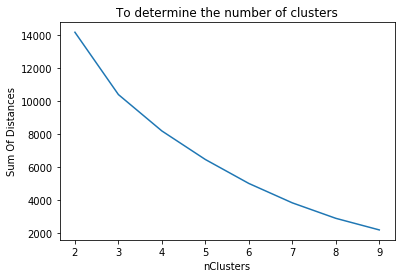

In [66]:
#Plotting the elbow curve to determine the number of clusters
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.title("To determine the number of clusters")
plt.show()

<b>The above elbow curve shows that there are 3 number of clusters to be made which implies that distance plays an important role. 

In [67]:
kmeans=KMeans(n_clusters=3).fit(dataSamplingCluster_dist)

dataSampling['Cluster_1']=kmeans.labels_
#g = sns.pairplot(data,hue='Cluster')

In [68]:
dataSampling.head()

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2,Cluster,Cluster_1
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,98,LaSalle St & Washington St,15.0,0.520458,1,1,0,1,0,2
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,35,Streeter Dr & Grand Ave,47.0,0.752934,1,1,1,1,5,2
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,54,Ogden Ave & Chicago Ave,19.0,1.669235,1,1,0,1,0,2
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,291,Wells St & Evergreen Ave,19.0,0.317107,1,1,0,1,0,2
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,195,Columbus Dr & Randolph St,47.0,0.204814,1,0,0,1,1,1


In [69]:
dataSampling

,trip_id,month,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,...,to_station_id,to_station_name,dpcapacity_end,Distance_Covered,Male,rushhour,weekend,distance_2,Cluster,Cluster_1
2061116,16263336,9,2,9,Subscriber,Male,2017-09-06 09:12:55,2017-09-06 09:18:07,5.200000,59.0,...,98,LaSalle St & Washington St,15.0,0.520458,1,1,0,1,0,2
2107963,16332265,9,6,9,Subscriber,Male,2017-09-10 09:52:13,2017-09-10 09:59:27,7.233333,63.0,...,35,Streeter Dr & Grand Ave,47.0,0.752934,1,1,1,1,5,2
1653190,15587331,8,4,16,Subscriber,Male,2017-08-04 16:05:01,2017-08-04 16:18:24,13.383333,66.0,...,54,Ogden Ave & Chicago Ave,19.0,1.669235,1,1,0,1,0,2
2095010,16310240,9,4,18,Subscriber,Male,2017-09-08 18:34:51,2017-09-08 18:37:13,2.366667,62.1,...,291,Wells St & Evergreen Ave,19.0,0.317107,1,1,0,1,0,2
790128,14151656,5,3,12,Subscriber,Male,2017-05-25 12:26:23,2017-05-25 12:35:57,9.566667,64.0,...,195,Columbus Dr & Randolph St,47.0,0.204814,1,0,0,1,1,1
2440769,16828122,10,4,11,Subscriber,Female,2017-10-06 11:52:00,2017-10-06 11:57:00,5.050000,64.0,...,22,May St & Taylor St,15.0,0.277296,0,0,0,1,4,0
1830991,15880330,8,4,9,Subscriber,Female,2017-08-18 09:09:48,2017-08-18 09:28:15,18.450000,72.0,...,196,Cityfront Plaza Dr & Pioneer Ct,23.0,1.858597,0,1,0,1,2,0
2057758,16259033,9,2,6,Subscriber,Male,2017-09-06 06:39:05,2017-09-06 06:43:09,4.066667,50.0,...,293,Broadway & Wilson Ave,15.0,0.494687,1,0,0,1,1,1
791944,14154849,5,3,16,Subscriber,Male,2017-05-25 16:22:37,2017-05-25 16:30:41,8.066667,66.0,...,504,Campbell Ave & Fullerton Ave,15.0,1.455819,1,1,0,1,0,2
1587831,15488449,7,0,6,Subscriber,Female,2017-07-31 06:51:00,2017-07-31 07:05:14,14.233333,68.0,...,25,Michigan Ave & Pearson St,23.0,1.152962,0,0,0,1,4,0


In [70]:
dataSampling_cols_to_keep=dataSampling[["trip_id","tripduration","temperature","Distance_Covered","Male","Cluster_1"]].copy()

In [71]:
dataSampling_cols_to_keep

,trip_id,tripduration,temperature,Distance_Covered,Male,Cluster_1
2061116,16263336,5.200000,59.0,0.520458,1,2
2107963,16332265,7.233333,63.0,0.752934,1,2
1653190,15587331,13.383333,66.0,1.669235,1,2
2095010,16310240,2.366667,62.1,0.317107,1,2
790128,14151656,9.566667,64.0,0.204814,1,1
2440769,16828122,5.050000,64.0,0.277296,0,0
1830991,15880330,18.450000,72.0,1.858597,0,0
2057758,16259033,4.066667,50.0,0.494687,1,1
791944,14154849,8.066667,66.0,1.455819,1,2
1587831,15488449,14.233333,68.0,1.152962,0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


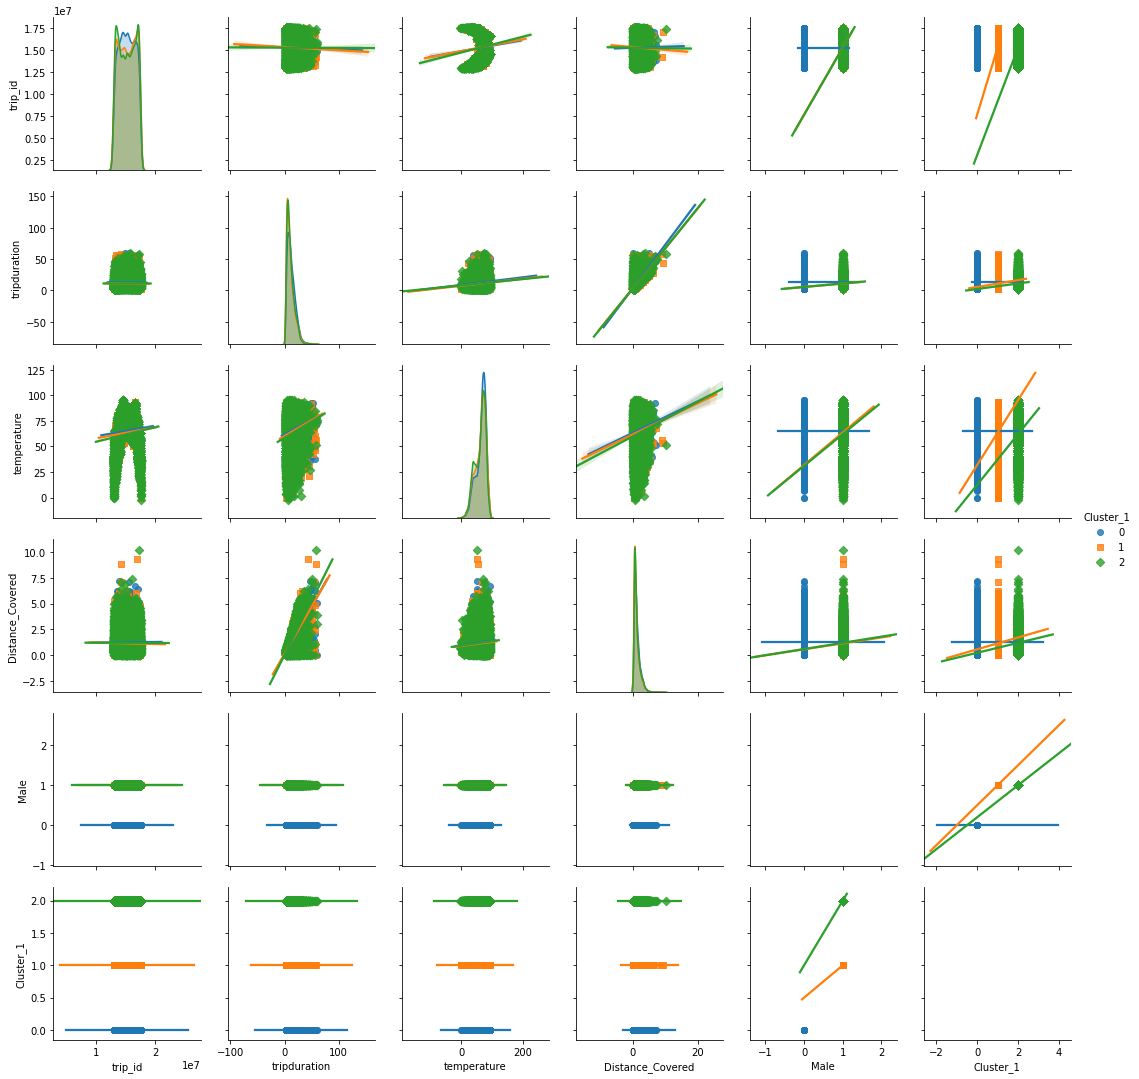

In [72]:
g = sns.pairplot(dataSampling_cols_to_keep,hue='Cluster_1',markers=["o","s","D"],kind='reg')

## MULTI VARIABLE LINEAR REGRESSION

In [73]:
dataSampling1=datan.sample(frac=0.01)

In [74]:
dataSampling1=dataSampling1.sort_values('trip_id')

In [75]:
dataSampling1=dataSampling1.reset_index()
dataSampling1=dataSampling1.drop(columns=['index'],axis=1)
dataSampling1.head()

,trip_id,year,month,day,hour,usertype,gender,starttime,stoptime,tripduration,...,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,Distance_Covered
0,12979295,2017,1,6,1,Subscriber,Male,2017-01-01 01:31:08,2017-01-01 01:44:01,12.883333,...,Sangamon St & Washington Blvd (*),41.883004,-87.651148,16.0,434,Ogden Ave & Roosevelt Rd,41.866501,-87.684697,19.0,2.069269793327424
1,12979429,2017,1,6,8,Subscriber,Male,2017-01-01 08:15:38,2017-01-01 08:30:17,14.650000,...,Francisco Ave & Foster Ave,41.975633,-87.701419,15.0,239,Western Ave & Leland Ave,41.966555,-87.688487,19.0,0.9139241467866069
2,12979466,2017,1,6,9,Subscriber,Female,2017-01-01 09:13:28,2017-01-01 09:19:57,6.483333,...,Larrabee St & Kingsbury St,41.897764,-87.642884,39.0,337,Clark St & Chicago Ave,41.896544,-87.630931,19.0,0.6206808067849756
3,12979899,2017,1,6,12,Subscriber,Male,2017-01-01 12:27:40,2017-01-01 12:35:31,7.850000,...,Larrabee St & Armitage Ave,41.918084,-87.643749,11.0,87,Racine Ave & Fullerton Ave,41.925563,-87.658404,19.0,0.91387171936734
4,12979943,2017,1,6,12,Subscriber,Male,2017-01-01 12:39:29,2017-01-01 12:53:12,13.716667,...,Adler Planetarium,41.866095,-87.607267,35.0,195,Columbus Dr & Randolph St,41.884728,-87.619521,47.0,1.4339347772435178


<b> Creating new column 'Rush hour' to store rush hour(1)/non-rush hour data(0)

In [76]:
def rush(row):
    r=0
    if (row.hour>=7 and row.hour<=10) or (row.hour>=16 and row.hour<=19):
        r=1
    else:
        r=0
    return(r)
dataSampling1['Rush_Hour']=dataSampling1.apply(rush,axis=1)

<b> Creating new column 'Weekday_Weekend' to store weekday(1) and weekend(0) information

In [77]:
def wday(row):
    r=0
    if row.day<=4:
        r=1
    elif row.day>4 and row.day<7:
        r=0
    return r
dataSampling1['Weekday_Weekend']=dataSampling1.apply(wday,axis=1)

In [78]:
dataSampling1.groupby("starttime").head()

,trip_id,year,month,day,hour,usertype,gender,starttime,stoptime,tripduration,...,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,Distance_Covered,Rush_Hour,Weekday_Weekend
0,12979295,2017,1,6,1,Subscriber,Male,2017-01-01 01:31:08,2017-01-01 01:44:01,12.883333,...,-87.651148,16.0,434,Ogden Ave & Roosevelt Rd,41.866501,-87.684697,19.0,2.069269793327424,0,0
1,12979429,2017,1,6,8,Subscriber,Male,2017-01-01 08:15:38,2017-01-01 08:30:17,14.650000,...,-87.701419,15.0,239,Western Ave & Leland Ave,41.966555,-87.688487,19.0,0.9139241467866069,1,0
2,12979466,2017,1,6,9,Subscriber,Female,2017-01-01 09:13:28,2017-01-01 09:19:57,6.483333,...,-87.642884,39.0,337,Clark St & Chicago Ave,41.896544,-87.630931,19.0,0.6206808067849756,1,0
3,12979899,2017,1,6,12,Subscriber,Male,2017-01-01 12:27:40,2017-01-01 12:35:31,7.850000,...,-87.643749,11.0,87,Racine Ave & Fullerton Ave,41.925563,-87.658404,19.0,0.91387171936734,0,0
4,12979943,2017,1,6,12,Subscriber,Male,2017-01-01 12:39:29,2017-01-01 12:53:12,13.716667,...,-87.607267,35.0,195,Columbus Dr & Randolph St,41.884728,-87.619521,47.0,1.4339347772435178,0,0
5,12980363,2017,1,6,14,Subscriber,Female,2017-01-01 14:18:34,2017-01-01 14:43:39,25.083333,...,-87.619407,15.0,3,Shedd Aquarium,41.867226,-87.615355,31.0,0.6964936401088881,0,0
6,12980751,2017,1,6,16,Subscriber,Female,2017-01-01 16:12:32,2017-01-01 16:35:01,22.483333,...,-87.612043,47.0,181,LaSalle St & Illinois St,41.890755,-87.632009,31.0,1.032628134193651,1,0
7,12980776,2017,1,6,16,Subscriber,Male,2017-01-01 16:20:09,2017-01-01 16:43:09,23.000000,...,-87.668365,19.0,177,Theater on the Lake,41.926277,-87.630834,23.0,3.784508874476463,1,0
8,12981066,2017,1,6,18,Subscriber,Male,2017-01-01 18:21:31,2017-01-01 18:28:48,7.283333,...,-87.677411,19.0,219,Damen Ave & Cortland St,41.916027,-87.677411,19.0,0.0,1,0
9,12981191,2017,1,6,19,Subscriber,Male,2017-01-01 19:57:33,2017-01-01 20:05:50,8.283333,...,-87.648830,15.0,343,Racine Ave & Wrightwood Ave,41.928887,-87.658971,15.0,0.8091181520312276,1,0


In [79]:
import datetime

def getFullDate(row):
    temp = row["starttime"].split(" ")
    date=temp[0]
    date=date.replace('-','/')
    date=datetime.datetime.strptime(date,"%Y/%m/%d")
    return date


dataSampling1["Date"] = dataSampling1.apply(getFullDate, axis=1) #.apply() function applies function along input axis of DataFrame

In [80]:
temp1=dataSampling1
temp2=dataSampling1

In [81]:
rel_cols1=["Date","Distance_Covered","temperature","tripduration","Weekday_Weekend"]
rel_cols2=["Date","trip_id"]

In [82]:
temp1=temp1[rel_cols1]
temp2=temp2[rel_cols2]
temp2.trip_id=1

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [83]:
temp1["Distance_Covered"] = temp1["Distance_Covered"].apply(convertToFloat)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
x=temp1.groupby('Date').agg('mean')
y=temp2.groupby('Date').agg('sum')

In [85]:
temp1=temp1.merge(temp2)
temp1=temp1.drop_duplicates("Date")

In [86]:
temp1=temp1.reset_index()

In [87]:
temp1.drop("index",axis=1)

,Date,Distance_Covered,temperature,tripduration,Weekday_Weekend,trip_id
0,2017-01-01,2.069270,21.0,12.883333,0,1
1,2017-01-02,0.827706,34.0,6.833333,1,1
2,2017-01-03,0.282216,37.9,5.800000,1,1
3,2017-01-04,0.778444,10.0,6.916667,1,1
4,2017-01-05,1.307826,7.0,12.933333,1,1
5,2017-01-06,0.501056,-0.0,3.716667,1,1
6,2017-01-07,0.380524,1.9,4.783333,0,1
7,2017-01-08,1.023495,3.9,11.600000,0,1
8,2017-01-09,0.564949,21.0,3.583333,1,1
9,2017-01-10,0.448282,36.0,2.466667,1,1


In [88]:
for d in temp1.index.values:
    temp1['Distance_Covered'][d]=x['Distance_Covered'][d]
    temp1['temperature'][d]=x['temperature'][d]
    temp1['tripduration'][d]=x['tripduration'][d]
    temp1['Weekday_Weekend'][d]=x['Weekday_Weekend'][d]
    temp1['trip_id'][d]=y['trip_id'][d]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ip

In [89]:
temp1=temp1.drop("index",axis=1)

<b> DISTANCE COVERED(Y) VS TEMPERATURE, WEEKEND/WEEKDAY, TRIP DURATION (MULTI LINEAR REGRESSION)

In [90]:
result = sm.ols(formula="Distance_Covered ~ temperature + Weekday_Weekend + tripduration ", data=temp1).fit()

In [91]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Distance_Covered   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     375.9
Date:                Thu, 04 Apr 2019   Prob (F-statistic):          1.14e-110
Time:                        02:16:58   Log-Likelihood:                 394.32
No. Observations:                 365   AIC:                            -780.6
Df Residuals:                     361   BIC:                            -765.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1348      0.035     

<b> DISTANCE COVERED is highly correlated to TEMPERATURE, WEEKEND/WEEKDAY, TRIP DURATION with an R-sq value of 65% and has a significant relations with 0 p-value

<b> NUMBER OF TRIPS(Y) VS TEMPERATURE, WEEKEND/WEEKDAY (MULTI LINEAR REGRESSION)

In [92]:
result = sm.ols(formula="trip_id~ temperature + Weekday_Weekend ", data=temp1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                trip_id   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     600.2
Date:                Thu, 04 Apr 2019   Prob (F-statistic):          1.13e-115
Time:                        02:16:58   Log-Likelihood:                -1631.1
No. Observations:                 365   AIC:                             3268.
Df Residuals:                     362   BIC:                             3280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -43.7704      3.782    -

<b> #Trips is highly correlated to TEMPERATURE, WEEKEND/WEEKDAY with an R-sq value of 77% and has a significant relations with 0 p-value

## CHICAGO MAP

In [ ]:
map_wl = folium.Map(location=[41.881832, -87.623177])

# PLOTTING THE STATIONS ON THE MAP OF CHICAGO

<B>ORIGINALLY WE PLOTTED THE MAP USING A DICTIONARY, WHERE EACH TUPLE OF LATITUDE AND LONGITUDE IS A KEY AND THE VALUE WAS TO MEASURE WHETHER IT WAS PLOTTED OR NOT <BR> AS IT WAS NOT EFFICIENT IN TERMS OF TIME REQUIRED. SO WE DROPPED THE DUPLICATES AND PLOTTED THE SAME MAP

In [ ]:
my_map_all = folium.Map(location=[41.881832, -87.623177], zoom_start=15)
tempdf=datan
tempdf=tempdf.drop_duplicates(subset='from_station_name', keep="last")
tempdf=tempdf.reset_index()
tempdf=tempdf.drop(columns="index")
for d in tempdf.index.values:
    points=[]
    points.append(tuple([tempdf.latitude_start[d],tempdf.longitude_start[d]]))
    folium.Marker(points[0],icon=folium.Icon(color='blue'),popup=datan.from_station_name[d]).add_to(my_map_all)
my_map_all.save("All Stations.html")

In [ ]:
my_map_all

# PLOTTING THE TOP 5 STATIONS 

In [ ]:
my_map = folium.Map(location=[41.881832, -87.623177], zoom_start=15)
c=0
for d in tempdf.index.values:
    if tempdf.from_station_name[d]=='Canal St & Adams St' or tempdf.from_station_name[d]=='Clinton St & Washington Blvd'\
        or tempdf.from_station_name[d]=='Clinton St & Madison St' or tempdf.from_station_name[d]=='Kingsbury St & Kinzie St'\
        or tempdf.from_station_name[d]=='Franklin St & Monroe St' and c<5:
        points=[]
        points.append(tuple([tempdf.latitude_start[d],tempdf.longitude_start[d]]))
        folium.Marker(points[0],icon=folium.Icon(color='blue'),popup=datan.from_station_name[d]).add_to(my_map)
        c+=1
    
# Load map centred on average coordinates
 
#add a markers
 
#fadd lines
 
# Save map
my_map.save("Top 5 Stations.html")
my_map

# HEATMAP OF THE STATIONS DURING PEAK/RUSH HOURS

In [ ]:
stops_heatmap = folium.Map(location=[41.881832, -87.623177], zoom_start=15)
for name, row in datan.iloc[:1000].iterrows():
    if (row.hour>=7 and row.hour<=10) or (row.hour>=7 and row.hour<=10):
        stops_heatmap.add_child(plugins.HeatMap([[row["latitude_start"], row["longitude_start"]]]))
stops_heatmap.save("heatmapfav.html")
stops_heatmap

# ROUTES FROM TOP 5

In [ ]:
my_map_fav = folium.Map(location=[41.881832, -87.623177], zoom_start=14)
c1=0
c2=0
c3=0
c4=0
c5=0
for d in datan.index.values:
    if(c1<=5 or c2<=5 or c3<=5 or c4<=5 or c5<=5) and ((datan.hour[d]>=7 and datan.hour[d]<=10) or (datan.hour[d]>=7 and datan.hour[d]<=10)): 
        if datan.from_station_name[d]=='Canal St & Adams St' or datan.from_station_name[d]=='Clinton St & Washington Blvd'\
        or datan.from_station_name[d]=='Clinton St & Madison St' or datan.from_station_name[d]=='Kingsbury St & Kinzie St'\
        or datan.from_station_name[d]=='Franklin St & Monroe St':
            points=[]
            points.append(tuple([datan.latitude_start[d],datan.longitude_start[d]]))
            points.append(tuple([datan.latitude_end[d],datan.longitude_end[d]]))
            i=1
            for each in points:  
                if datan.from_station_name[d]=='Canal St & Adams St' and c1<=5:
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red')).add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                        c1+=1
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='blue'),popup='Canal St & Adams St').add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Clinton St & Washington Blvd' and c2<=5:
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red')).add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                        c2+=1
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='blue'),popup='Clinton St & Washington Blvd').add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Kingsbury St & Kinzie St' and c3<=5:
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red')).add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                        c3+=1
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='blue'),popup='Kingsbury St & Kinzie St').add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Franklin St & Monroe St' and c4<=5:
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red')).add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                        c4+=1
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='blue'),popup='Franklin St & Monroe St').add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Clinton St & Madison St' and c5<=5:
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red')).add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
                        c5+=1
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='indigo'),popup='Clinton St & Madison St').add_to(my_map_fav)
                        folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map_fav)
my_map_fav.save("Rush Hour Routes starting From Top 5 Stations.html")
my_map_fav

# HEAT MAP OF THE STATIONS IN CHICAGO

In [ ]:
stops_heatmap = folium.Map(location=[41.881832, -87.623177], zoom_start=16)
stops_heatmap.add_child(plugins.HeatMap([[row["latitude_start"], row["longitude_start"]] for name, row in datan.iloc[:1000].iterrows()]))
stops_heatmap.save("heatmap.html")
stops_heatmap

Most popular starting point

In [ ]:
x=datan.groupby('from_station_name')
y=x.trip_id.count().sort_values(ascending=False)
print(y)

# WE'RE PLOTTING JOURNEYS THAT ORIGINATED FROM <BR>THE TOP 5 POPULAR STATIONS

In [ ]:
my_map_fav = folium.Map(location=[41.881832, -87.623177], zoom_start=14)
c=0
for d in datan.index.values:
    if(c<=5000):
        if datan.from_station_name[d]=='Canal St & Adams St' or datan.from_station_name[d]=='Clinton St & Washington Blvd'\
        or datan.from_station_name[d]=='Clinton St & Madison St' or datan.from_station_name[d]=='Kingsbury St & Kinzie St'\
        or datan.from_station_name[d]=='Franklin St & Monroe St':
            points=[]
            points.append(tuple([datan.latitude_start[d],datan.longitude_start[d]]))
            points.append(tuple([datan.latitude_end[d],datan.longitude_end[d]]))
            i=1
            c+=1
            for each in points:  
                if datan.from_station_name[d]=='Canal St & Adams St':
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red'),popup=datan.to_station_name[d]).add_to(my_map_fav)
                        folium.PolyLine(points, color="black", weight=2.5, opacity=1).add_to(my_map_fav)
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='black'),popup='Canal St & Adams St').add_to(my_map_fav)
                        folium.PolyLine(points, color="black", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Clinton St & Washington Blvd':
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red'),popup=datan.to_station_name[d]).add_to(my_map_fav)
                        folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(my_map_fav)
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='blue'),popup='Clinton St & Washington Blvd').add_to(my_map_fav)
                        folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Kingsbury St & Kinzie St':
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red'),popup=datan.to_station_name[d]).add_to(my_map_fav)
                        folium.PolyLine(points, color="green", weight=2.5, opacity=1).add_to(my_map_fav)
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='green'),popup='Kingsbury St & Kinzie St').add_to(my_map_fav)
                        folium.PolyLine(points, color="green", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Franklin St & Monroe St':
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red'),popup=datan.to_station_name[d]).add_to(my_map_fav)
                        folium.PolyLine(points, color="yellow", weight=2.5, opacity=1).add_to(my_map_fav)
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='yellow'),popup='Franklin St & Monroe St').add_to(my_map_fav)
                        folium.PolyLine(points, color="yellow", weight=2.5, opacity=1).add_to(my_map_fav)
                elif datan.from_station_name[d]=='Clinton St & Madison St':
                    if(i%2==0):
                        folium.Marker(each,icon=folium.Icon(color='red'),popup=datan.to_station_name[d]).add_to(my_map_fav)
                        folium.PolyLine(points, color="indigo", weight=2.5, opacity=1).add_to(my_map_fav)
                    else:
                        i+=1
                        folium.Marker(each,icon=folium.Icon(color='indigo'),popup='Clinton St & Madison St').add_to(my_map_fav)
                        folium.PolyLine(points, color="indigo", weight=2.5, opacity=1).add_to(my_map_fav)
my_map_fav.save("favroute.html")
my_map_fav

## SURVEY SIMULATION  (We created a new design for females and this simulation shows the survey results if female riders are willing to use the service spost that or not)

In [ ]:
di={}
di['Yes']=0
di['No']=0
di['Unsure']=0
for i in range(10000):
    pyes=np.random.uniform(0.3,0.35)
    pno=np.random.uniform(0.20,0.25)
    pud=1-(pyes+pno)
    survey=np.random.choice(['Yes','No','Unsure'],p=[pyes,pno,pud],size=1)
    for j in range(len(survey)):
        di[survey[j]]+=1
plt.bar(di.keys(),di.values(),width=0.1)
print(di)
t1=time.time()

## TIME COMPLEXITY (TIME TO RUN THE ENTIRE CODE)

In [ ]:
print("Time Required to run the entire notebook:",(t1-t0))

In [ ]:
t=[0.0]*3
ctr=0
x=[0.01,0.02,0.03]
for d in x:
    if ctr<3:
        dataSampling3=datan.sample(frac=d)
        dataSampling3=dataSampling3.sort_values('trip_id')
        dataSampling3=dataSampling3.reset_index()
        dataSampling3=dataSampling3.drop(columns=['index'],axis=1)
        dataSampling3.head()
        dataSampling3['Rush_Hour']=dataSampling3.apply(rush,axis=1)
        dataSampling3['Weekday_Weekend']=dataSampling3.apply(wday,axis=1)
        dataSampling3.groupby("starttime").head()
        dataSampling3["Date"] = dataSampling3.apply(getFullDate, axis=1) #.apply() function applies function along input axis of DataFrame
        t3=time.time()
        temp1=dataSampling3
        temp2=dataSampling3
        rel_cols1=["Date","Distance_Covered","temperature","tripduration","Weekday_Weekend"]
        rel_cols2=["Date","trip_id"]
        temp1=temp1[rel_cols1]
        temp2=temp2[rel_cols2]
        temp2.trip_id=1
        temp1["Distance_Covered"] = temp1["Distance_Covered"].apply(convertToFloat)
        x=temp1.groupby('Date').agg('mean')
        y=temp2.groupby('Date').agg('sum')
        temp1=temp1.merge(temp2)
        temp1=temp1.drop_duplicates("Date")
        temp1=temp1.reset_index()
        temp1.drop("index",axis=1)
        for d in temp1.index.values:
            temp1['Distance_Covered'][d]=x['Distance_Covered'][d]
            temp1['temperature'][d]=x['temperature'][d]
            temp1['tripduration'][d]=x['tripduration'][d]
            temp1['Weekday_Weekend'][d]=x['Weekday_Weekend'][d]
            temp1['trip_id'][d]=y['trip_id'][d]
        temp1=temp1.drop("index",axis=1)
        result = sm.ols(formula="Distance_Covered ~ temperature + Weekday_Weekend + tripduration ", data=temp1).fit()
        #print("Sample size",d,"\n",result.summary())
        result = sm.ols(formula="trip_id~ temperature + Weekday_Weekend ", data=temp1).fit()
        #print("Sample size",d,"\n",result.summary())
        result = sm.ols(formula="tripduration ~ temperature + Weekday_Weekend ", data=temp1).fit()
        #print("Sample size",d,"\n",result.summary())
        t4=time.time()
        t[ctr]=t4-t3
        ctr+=1

In [ ]:
print("Time Required for Sample sizes 1x,2x and 3x is",(t)," seconds")